## Portfolio assignment 19
30 min: Create a cluster model on the penguins dataset.
- Use the pairplot() function on the penguins dataset. Do you visually notice any clusters? How many clusters do you think there are?
- Use the KMeans algorithm to create a cluster model. Apply this model to the dataset to create an extra column 'cluster' just like we did for the iris dataset above.  
<b>Note</b>: Some machine learning algorithms can not handle missing values. You will either need to 
 - replace missing values (with the mean or most popular value). For replacing missing values you can use .fillna(\<value\>) https://pandas.pydata.org/docs/reference/api/pandas.Series.fillna.html
 - remove rows with missing data.  You can remove rows with missing data with .dropna() https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
- Calculate the Silhouette Coefficient for your clustering. Play around with the features and n_clusters to search for better results. Keep the cluster model with the highest Silhouette Coefficient.
- Use the pairplot(hue='cluster') function to observe how the model has clustered the data.
- We know the species of each penguin. Use a contingency table to reveal the relation between the cluster results and the species. Is there an exact match? Are there species which ended up in the same cluster? If so, what does it mean that they ended up in the same cluster?

In [72]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [73]:
import seaborn as sns
from sklearn.cluster import KMeans

In [74]:
penguins = sns.load_dataset("penguins")
penguins.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

In [75]:
values = {
  'bill_length_mm': penguins['bill_length_mm'].mean(),
  'bill_depth_mm': penguins['bill_depth_mm'].mean(),
  'flipper_length_mm': penguins['flipper_length_mm'].mean(),
  'body_mass_g': penguins['body_mass_g'].mean()
  }
penguins = penguins.fillna(value=values)

# penguins = penguins.dropna()

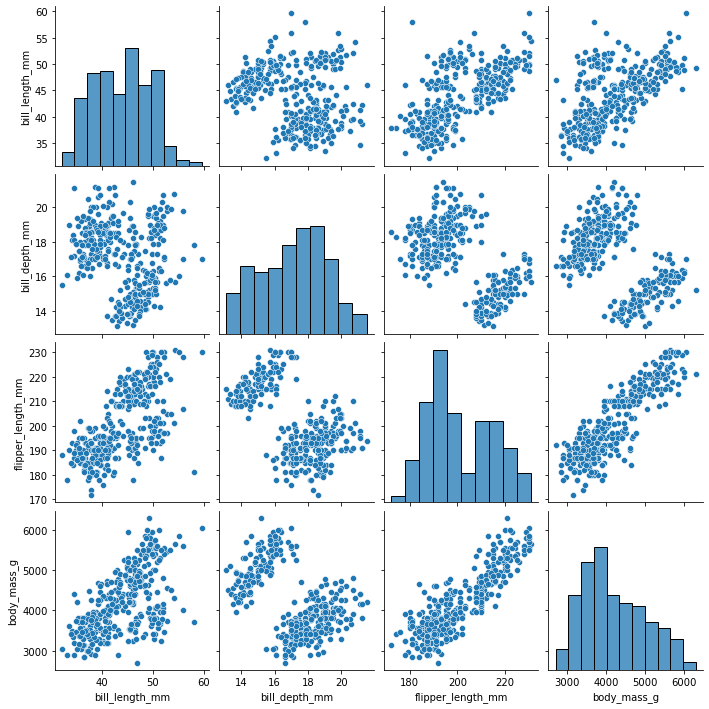

In [76]:
sns.pairplot(penguins)

In [77]:
features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']
km = KMeans(n_clusters=2, random_state=42).fit(penguins[features])

In [78]:
penguins['cluster'] = km.predict(penguins[features])

In [79]:
penguins.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen        39.10000       18.70000         181.000000   
1  Adelie  Torgersen        39.50000       17.40000         186.000000   
2  Adelie  Torgersen        40.30000       18.00000         195.000000   
3  Adelie  Torgersen        43.92193       17.15117         200.915205   
4  Adelie  Torgersen        36.70000       19.30000         193.000000   

   body_mass_g     sex  cluster  
0  3750.000000    Male        0  
1  3800.000000  Female        0  
2  3250.000000  Female        0  
3  4201.754386     NaN        0  
4  3450.000000  Female        0

In [80]:
penguins.cluster.value_counts()

0    211
1    133
Name: cluster, dtype: int64

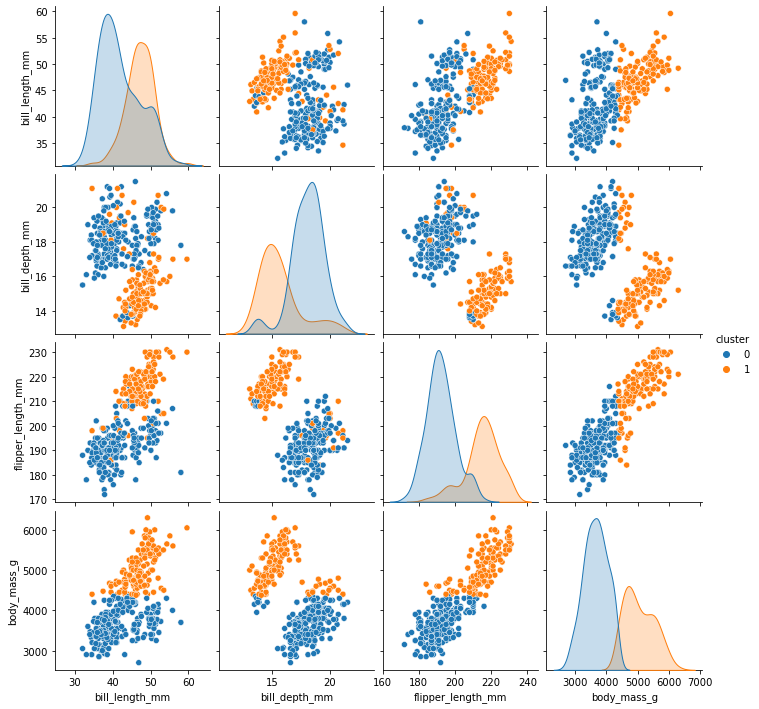

In [81]:
sns.pairplot(penguins, hue="cluster")

### Evaluating the model

In [82]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances

In [83]:
metrics.silhouette_score(penguins[features], km.labels_, metric='euclidean')

0.6270788983241281

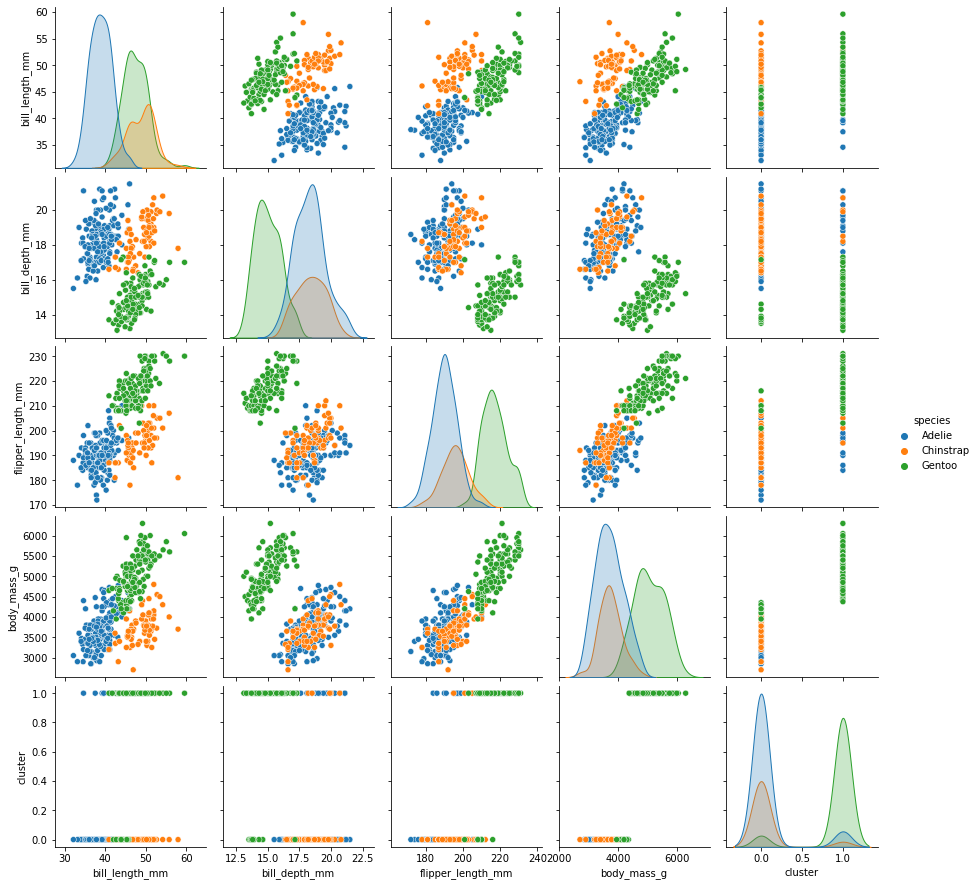

In [84]:
sns.pairplot(penguins, hue='species')

In [85]:
contingency_table = penguins.groupby(['species', 'cluster']).size().unstack('cluster', fill_value=0)
contingency_table

cluster      0    1
species            
Adelie     138   14
Chinstrap   63    5
Gentoo      10  114

sometimes there is overlap between the clusters, which means that their characteristics were similar to those of other species. Only the Gentoo penguin has cluster 3 all for itself. This is because the Gentoo is generally a bigger size than the other species